In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
import pickle
import pandas as pd
import scanpy as sc

import random
random.seed(42)


In [4]:
model_path = "/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/figures/multiregressor/iGlut_post_mTeSR_7.p"

with open(model_path, "rb") as f:
    model = pickle.load(f)


In [151]:
model.estimators_[0].feature_importances_

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
       4.5559131e-05, 0.0000000e+00])

In [152]:
model.estimators_[0].feature_names_in_

array(['TSPAN6', 'TNMD', 'DPM1', ..., 'ENSG00000291315',
       'ENSG00000291316', 'TMEM276'], dtype=object)

In [5]:
model

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=10,
                                                     max_features='sqrt',
                                                     n_jobs=20,
                                                     random_state=42),
                     n_jobs=4)

In [6]:
meta = pd.read_csv("classifier_results/XGB_classifier_extraEGFP_0.85_precision.tsv",sep="\t",index_col=0)

In [7]:
#load primary data
#load aucell values of primary data
#select top cells for selected regulons and morphogen combinations

sample = 'iGlut_post'
print(sample)

adata = sc.read_h5ad("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/"+sample+"_dr_clustered_raw_merged.h5ad")

#load metadata
meta = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/"+sample+"_dr_clustered_raw_merged_meta.tsv",sep="\t",index_col=0)
meta['M_CycA'] = meta['CycA']

#define morphogens
morphogens = ['XAV', 'CHIR', 'RA', 'FGF8', 'BMP4', 'SHH','CycA']
morphogens = ['M_'+x for x in morphogens]


iGlut_post


In [8]:
adata_oe = sc.read_h5ad("adata/NGN2iN_TF_batch12_combined_filtered_doublets_labeled.h5ad")
adata_oe.obs['BC'] = adata_oe.obs.index

In [9]:
primary_genes = adata.var_names

In [10]:
import anndata as ad

common_genes = list(set(primary_genes)&set(adata_oe.var_names))
print("genes common in adata and in model")
print(len(common_genes))
missing_genes = [x for x in primary_genes if x not in common_genes]
print("genes missing in adata from model")
print(len(missing_genes))


genes common in adata and in model
22639
genes missing in adata from model
40071


In [11]:
meta_bk = adata_oe.obs.copy()
print('replacing missing genes with 0')
# If there are missing genes, add them with values of 0
if missing_genes:
    # Create a matrix of zeros to add to the new AnnData
    zero_values = np.zeros((adata_oe.shape[0], len(missing_genes)))

    # Create an AnnData object for the missing genes with zero values
    missing_genes_adata = ad.AnnData(zero_values, obs=adata_oe.obs, var=pd.DataFrame(index=missing_genes))

    # Concatenate the new AnnData with the missing genes to the subset
    adata_oe = ad.concat([adata_oe, missing_genes_adata], axis=1)


replacing missing genes with 0


In [12]:
adata_oe = adata_oe[:,primary_genes]

In [13]:
dgem = pd.DataFrame.sparse.from_spmatrix(adata_oe.X)
dgem.index = adata_oe.obs.index
dgem.columns = adata_oe.var_names
dgem.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,POLGARF,ENSG00000291308,LY6S,ENSG00000291310,ENSG00000291312,ENSG00000291313,ENSG00000291314,ENSG00000291315,ENSG00000291316,TMEM276
AAACGAAGTTACGTAC-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGAATCCACTTTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCTCAATAGAGT-1,3.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAGGATTCACCTACC-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAGGATTCTCTCTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_test = dgem

In [15]:
import time

In [19]:
k = 0
for i in [7,21,42,48,103]:
    model_path = "/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/figures/multiregressor/iGlut_post_mTeSR_"+str(i)+".p"
    
    with open(model_path, "rb") as f:
        model = pickle.load(f)
        time.sleep(1)
        Yp_test = model.predict(X_test)
        time.sleep(1)
        if k == 0:
            Yp_test_all = Yp_test.copy()
            k+=1
        else:
            Yp_test_all = Yp_test_all + Yp_test
        

/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [34]:
Yp_test_all = Yp_test_all/5

In [35]:
Yp_test

array([[0.05417531, 0.53791238, 0.192814  , 0.2347218 , 0.1648037 ,
        0.45370742],
       [0.14171528, 0.3775672 , 0.1674146 , 0.12307273, 0.17455495,
        0.40866974],
       [0.22285271, 0.7087916 , 0.15824886, 0.45008844, 0.2123748 ,
        0.40571171],
       ...,
       [0.15601516, 0.76321816, 0.28036982, 0.40614701, 0.22952166,
        0.43613611],
       [0.30978781, 0.66641801, 0.26644151, 0.36326847, 0.33201635,
        0.3745434 ],
       [0.14590979, 0.39966879, 0.1640986 , 0.1412083 , 0.1754853 ,
        0.41883931]])

In [36]:
Yp_test_all

,M_XAV_pred,M_CHIR_pred,M_RA_pred,M_FGF8_pred,M_BMP4_pred,M_SHH_pred
AAACGAAGTTACGTAC-1,0.058306,0.560992,0.197058,0.232987,0.174565,0.436454
AAACGAATCCACTTTA-1,0.142207,0.374609,0.171117,0.125180,0.181672,0.416906
AAACGCTCAATAGAGT-1,0.211125,0.735274,0.187884,0.425589,0.266489,0.408434
AAAGGATTCACCTACC-1,0.163595,0.404272,0.213510,0.131303,0.184622,0.422703
AAAGGATTCTCTCTTC-1,0.148668,0.383160,0.175513,0.129058,0.170698,0.430305
...,...,...,...,...,...,...
TTTGTTGCATAACGGG-2,0.227485,0.566134,0.278460,0.394852,0.310104,0.386784
TTTGTTGGTCATCGCG-2,0.141099,0.778900,0.247815,0.387477,0.266286,0.398296
TTTGTTGGTCTACAAC-2,0.161680,0.764611,0.267587,0.362841,0.234359,0.421137
TTTGTTGGTCTGCATA-2,0.225629,0.659239,0.328831,0.375153,0.319750,0.390384


In [37]:
morphogens = ['XAV','CHIR','RA','FGF8','BMP4','SHH'] #don't add PM
morphogens = ['M_'+x for x in morphogens]


In [38]:
Yp_test_all = pd.DataFrame(Yp_test_all)
Yp_test_all.index = dgem.index
Yp_test_all.columns = morphogens
import seaborn as sns
Yp_test_all.columns = [x+"_pred" for x in Yp_test_all.columns]

In [39]:
Yp_test_all

,M_XAV_pred,M_CHIR_pred,M_RA_pred,M_FGF8_pred,M_BMP4_pred,M_SHH_pred
AAACGAAGTTACGTAC-1,0.058306,0.560992,0.197058,0.232987,0.174565,0.436454
AAACGAATCCACTTTA-1,0.142207,0.374609,0.171117,0.125180,0.181672,0.416906
AAACGCTCAATAGAGT-1,0.211125,0.735274,0.187884,0.425589,0.266489,0.408434
AAAGGATTCACCTACC-1,0.163595,0.404272,0.213510,0.131303,0.184622,0.422703
AAAGGATTCTCTCTTC-1,0.148668,0.383160,0.175513,0.129058,0.170698,0.430305
...,...,...,...,...,...,...
TTTGTTGCATAACGGG-2,0.227485,0.566134,0.278460,0.394852,0.310104,0.386784
TTTGTTGGTCATCGCG-2,0.141099,0.778900,0.247815,0.387477,0.266286,0.398296
TTTGTTGGTCTACAAC-2,0.161680,0.764611,0.267587,0.362841,0.234359,0.421137
TTTGTTGGTCTGCATA-2,0.225629,0.659239,0.328831,0.375153,0.319750,0.390384


In [40]:
meta_class = pd.read_csv("classifier_results/XGB_classifier_extraEGFP_0.85_precision.tsv",sep="\t",index_col=0)

In [41]:
meta_class = pd.merge(meta_class,Yp_test_all,left_index=True,right_index=True)

Processing label: label_MSX1
Processing label: label_TLX2
Processing label: label_PHOX2B
Processing label: label_NFATC1
Processing label: label_LEF1
Processing label: label_TCF7L2
Processing label: label_TCF7L1
Processing label: label_LHX9
Processing label: label_NEUROD1
Processing label: label_ZFHX3


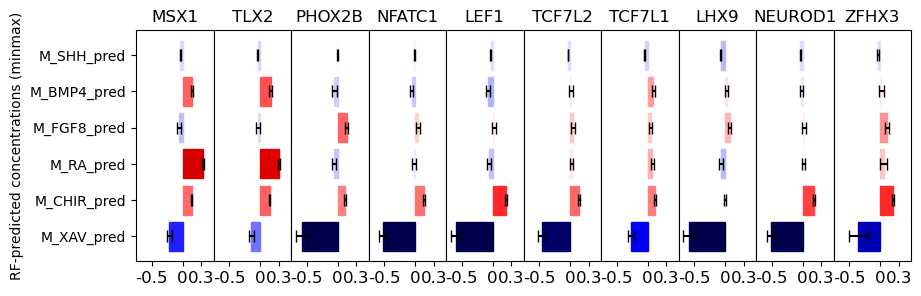

Processing Z-normalized label: label_MSX1
Processing Z-normalized label: label_TLX2
Processing Z-normalized label: label_PHOX2B
Processing Z-normalized label: label_NFATC1
Processing Z-normalized label: label_LEF1
Processing Z-normalized label: label_TCF7L2
Processing Z-normalized label: label_TCF7L1
Processing Z-normalized label: label_LHX9
Processing Z-normalized label: label_NEUROD1
Processing Z-normalized label: label_ZFHX3


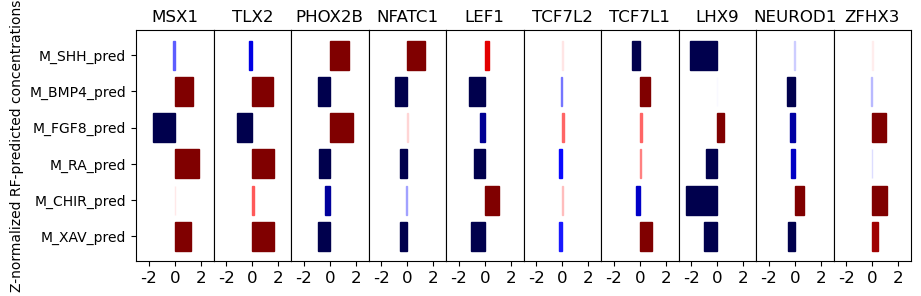

In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

def calculate_log2_fold_change_df(df_a, df_b):
    mean_a = df_a.mean(axis=1)
    mean_b = df_b.mean(axis=1)
    
    std_a = df_a.std(axis=1, ddof=1)
    std_b = df_b.std(axis=1, ddof=1)
    
    n_a = df_a.shape[1]
    n_b = df_b.shape[1]
    
    mean_fold_change = mean_b / mean_a
    se_fold_change = np.sqrt((std_a**2 / (n_a * mean_a**2)) + (std_b**2 / (n_b * mean_b**2)))
    
    log2_fc = np.log2(mean_fold_change)
    se_log2_fc = se_fold_change / (np.log(2) * mean_fold_change)
    
    results_df = pd.DataFrame({
        'Log2_Fold_Change': log2_fc,
        'SE_Log2_FC': se_log2_fc
    })
    
    return results_df

def z_normalize_across_labels(results_dict):
    all_means = pd.concat({k: v['Log2_Fold_Change'] for k, v in results_dict.items()}, axis=1)
    all_means = all_means.T
    normalized_means = (all_means - all_means.mean()) / all_means.std()
    return normalized_means

# Initialize storage for results
results_dict = {}

morphogens_pred = Yp_test_all.columns
unique_labels = labels_use

# Create a single row of subplots for the original data
n_cols = len(unique_labels)
fig, axes = plt.subplots(1, n_cols, figsize=(1 * n_cols, 3), sharey=True)
plt.subplots_adjust(wspace=0)

if n_cols == 1:
    axes = [axes]

# Loop over each label to generate the plots and save results
for idx, label in enumerate(unique_labels):
    try:
        print(f"Processing label: {label}")
        
        meta_label = meta_class.loc[meta_class['final_label'] == label]
        meta_label2 = meta_class.loc[meta_class['final_label'] == 'label_EGFP']

        df = meta_label[morphogens_pred].dropna(axis=1)
        df2 = meta_label2[morphogens_pred].dropna(axis=1)

        lfc_df = calculate_log2_fold_change_df(df2.T, df.T)
        normalized_means = lfc_df['Log2_Fold_Change']
        errors_df = lfc_df['SE_Log2_FC'].values
        
        results_dict[label] = lfc_df  # Save the results
        
        ax = axes[idx]
        y_positions = np.arange(len(normalized_means))
        bars = ax.barh(y_positions, normalized_means, xerr=errors_df, capsize=4, edgecolor='black')

        cmap = plt.get_cmap('seismic')
        norm = plt.Normalize(vmin=-0.5, vmax=0.5, clip=True)
        colors = normalized_means.apply(lambda x: cmap(norm(x)))

        for bar, color in zip(bars, colors):
            bar.set_color(color)

        ax.set_yticks(y_positions)
        ax.set_yticklabels(df.columns)
        ax.set_title(re.sub("label_", "", label))
        ax.set_xlim([-0.75, 0.5])

        if idx == 0:
            ax.set_ylabel('RF-predicted concentrations (minmax)')
        else:
            ax.set_ylabel('')
            ax.tick_params(left=False)

        # Adjust tick label positions to avoid overlap
        ticks = ax.get_xticks()
        tick_labels = ax.get_xticklabels()
        ticks = [-0.5,0,0.3]
        
        if len(ticks) > 1:
            tick_positions = ticks.copy()
            tick_positions[0] += 0  # Move the '0' tick slightly down
            tick_positions[-1] -= 0 # Move the '1' tick slightly up
            ax.set_xticks(tick_positions,ticks,fontsize=12)
            

    
    except Exception as e:
        print(f"FAIL for label {label}: {e}")
        fig.delaxes(axes[idx])

# Save the figure with the original plots
#plt.savefig("figures/RF_predicted_morphogen_concentrations_final_label.png", dpi=350, bbox_inches='tight', pad_inches=0)
#plt.savefig("figures/RF_predicted_morphogen_concentrations_final_label.pdf", dpi=350, bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()

# Perform Z-normalization across labels
normalized_means = z_normalize_across_labels(results_dict)
normalized_means = normalized_means.T
# Create a single row of subplots for the Z-normalized data
fig, axes = plt.subplots(1, n_cols, figsize=(1 * n_cols, 3), sharey=True)
plt.subplots_adjust(wspace=0)

if n_cols == 1:
    axes = [axes]

# Loop over each label to generate the Z-normalized plots
for idx, label in enumerate(unique_labels):
    try:
        print(f"Processing Z-normalized label: {label}")
        
        ax = axes[idx]
        z_norm_means = normalized_means[label]
        y_positions = np.arange(len(z_norm_means))
        bars = ax.barh(y_positions, z_norm_means, capsize=4, edgecolor='black')

        cmap = plt.get_cmap('seismic')
        norm = plt.Normalize(vmin=-0.5, vmax=0.5, clip=True)
        colors = z_norm_means.apply(lambda x: cmap(norm(x)))

        for bar, color in zip(bars, colors):
            bar.set_color(color)

        ax.set_yticks(y_positions)
        ax.set_yticklabels(normalized_means.index)
        ax.set_title(re.sub("label_", "", label))
        ax.set_xlim([-3, 3])  # Adjust the x-limits for Z-normalized data

        if idx == 0:
            ax.set_ylabel('Z-normalized RF-predicted concentrations')
        else:
            ax.set_ylabel('')
            ax.tick_params(left=False)


        # Adjust tick label positions to avoid overlap
        ticks = ax.get_xticks()
        tick_labels = ax.get_xticklabels()
        ticks = [-2,0,2]
        
        if len(ticks) > 1:
            tick_positions = ticks.copy()
            tick_positions[0] += 0  # Move the '0' tick slightly down
            tick_positions[-1] -= 0 # Move the '1' tick slightly up
            ax.set_xticks(tick_positions,ticks,fontsize=12)
            

    
    except Exception as e:
        print(f"FAIL for Z-normalized label {label}: {e}")
        fig.delaxes(axes[idx])

# Save the figure with the Z-normalized plots
plt.savefig("figures/Z_normalized_RF_predicted_morphogen_concentrations_final_label.png", dpi=350, bbox_inches='tight', pad_inches=0)
plt.savefig("figures/Z_normalized_RF_predicted_morphogen_concentrations_final_label.pdf", dpi=350, bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()
